In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# чтобы не было большого количества строк с технической информацией при подборе подходящих параметров. 
# При написании программы сообщения были включены, но при загрузке на github они мешают
import warnings
warnings.simplefilter('ignore')

# 1. Загрузить данные из папки Data Folder

In [2]:
columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

data = pd.read_csv('D:/[Обучение]/ML/Лабораторная работа 1/flag.data', names=columns)

data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


# 2. Провести описательный анализ предложенных данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

В данных отсутствуют пропуски. Есть также категориальные переменные.

In [4]:
#поскольку категориальные переменные заданы числами, мы не можем опираться при выделении категориальных переменных на тип столбца
#поэтому зададим вручную нужные нам столбцы

cat_feat = ['landmass', 'zone', 'language', 'mainhue', 'topleft', 'botright']
no_nun_feat = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'triangle', 'icon', 'animate', 'text', 'topleft', 'crescent']
num_feat = [f for f in data if f not in (cat_feat + no_nun_feat + ['religion'])]
target = ['religion']

In [5]:
data[num_feat].describe()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,700.046392,23.268041,0.453608,1.551546,3.463918,0.170103,0.149485,0.092784,0.149485,1.386598
std,2170.927932,91.934085,1.038339,2.328005,1.300154,0.463075,0.385387,0.290879,0.435860,4.396186
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,4.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,471.250000,14.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,22402.000000,1008.000000,5.000000,14.000000,8.000000,4.000000,2.000000,1.000000,4.000000,50.000000


# 3. Предложить стратегию по работе с категориальными переменными

Думаю, наиболее правильным вариантом было бы заменить значения, где стоят цифры вместо названий, вернуть соответствующие названия. Чтобы потом, если бы я использовала get_dummies, были адекватные названия столбцов.

In [6]:
data.landmass = data.landmass.replace({1: 'N.America', 2: 'S.America', 3:'Europe', 4:'Africa', 5:'Asia', 6: 'Oceania'})
data.zone = data.zone.replace({1: 'NE', 2: 'SE', 3: 'SW', 4: 'NW'})
data.language = data.language.replace({1: 'English', 2: 'Spanish', 3: 'French', 4: 'German', 5: 'Slavic', 6: 'Other Indo-European', 7: 'Chinese', 8: 'Arabic', 9: 'Japanese/Turkish/Finnish/Magyar', 10: 'Others'})

#колонку с религией я не трогаю, т.к. всё равно потом в цифры переводить её

# 4. Провести углубленный анализ данных (корреляции переменных,визуализация взаимосвязей)

Считаю корреляции не на категориальных переменных

In [7]:
data[num_feat].corr()

,area,population,bars,stripes,colours,circles,crosses,saltires,quarters,sunstars
area,1.000000,0.519030,0.001243,0.028454,-0.162227,-0.005652,-0.057888,-0.025492,-0.001968,0.340572
population,0.519030,1.000000,-0.041392,0.030100,-0.115052,0.051257,-0.076305,-0.059061,-0.041349,0.191377
bars,0.001243,-0.041392,1.000000,-0.273371,-0.064574,-0.096650,-0.144432,-0.140070,-0.150604,-0.114667
stripes,0.028454,0.030100,-0.273371,1.000000,0.038278,-0.087479,-0.190550,-0.190735,0.091941,0.215486
colours,-0.162227,-0.115052,-0.064574,0.038278,1.000000,0.178062,0.253827,0.378810,0.187861,0.031008
circles,-0.005652,0.051257,-0.096650,-0.087479,0.178062,1.000000,0.030979,0.151485,0.053062,0.071881
crosses,-0.057888,-0.076305,-0.144432,-0.190550,0.253827,0.030979,1.000000,0.707599,0.421509,0.008528
saltires,-0.025492,-0.059061,-0.140070,-0.190735,0.378810,0.151485,0.707599,1.000000,0.462187,0.085256
quarters,-0.001968,-0.041349,-0.150604,0.091941,0.187861,0.053062,0.421509,0.462187,1.000000,0.231980
sunstars,0.340572,0.191377,-0.114667,0.215486,0.031008,0.071881,0.008528,0.085256,0.231980,1.000000


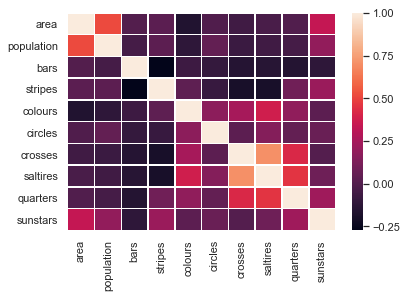

In [8]:
#для удобства, подсвечу визуально силу взаимосвязи

import seaborn as snb
snb.set()
snb.heatmap(data[num_feat].corr(), linewidths=0.5);

Самые сильные взаимосвязи между переменными quarters и crosses, а также между area и population

# 5. Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

У нас много колонок, но скорее всего, нужно смотреть на метрики качества. Если не возникнет проблем при работе методов, то такое количество колонок можно оставить.

# 6. Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E272929DA0>]],
      dtype=object)

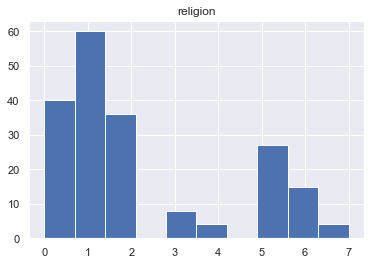

In [9]:
data[target].hist()

Т.к. классов 3,4 и 7 заметно меньше, чем других, то преобразование данных может улучшить результат.

# 7. Решить задачу мультиклассовойклассификации и предсказать религию страны(religion)по деталям ее флага

Т.к. в выборке дана информация по местонахождению страны, ее площади и т.д., из датасета я не стала убирать эти значения. Если нужно оставить только параметры флага, тогда убираются еще колонки с местонахождением страны, языком и т.д.

In [10]:
#подготовка данных, удаление столбцов, которые не относятся к флагам

Y_prep = data['religion']
X_prep = data.drop(['name', 'religion'], axis=1)

cat_feat = ['mainhue', 'topleft', 'botright', 'landmass', 'zone', 'language']
no_nun_feat = ['red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'triangle', 'icon', 'animate', 'text', 'topleft', 'crescent', 'area', 'population']
num_feat = [f for f in X_prep if f not in (cat_feat + no_nun_feat)]

In [11]:
# Поделим на train и тест (заранее, перед StandardScaler и т.д.), чтобы потом на тестовой выборке проверять качество моделей
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep, Y_prep, test_size=0.2)

In [12]:
# Создаем дамми-переменные для категорий

dummy_train = pd.get_dummies(X_train[cat_feat], columns=cat_feat)
dummy_test = pd.get_dummies(X_test[cat_feat], columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

In [13]:
#Т.к. алгоритмы у нас все метрические, то масштабирование применим уже здесь
#обучаю StandardScaler на тренировочной выборке, а применяю уже к тренировочной и к тестовой, 
# чтобы данные из тестовой выборки не "просочились" в обучающий процесс

from sklearn.preprocessing import StandardScaler

X_train_lin = pd.concat([X_train[num_feat], dummy_train], axis=1)

X_test_lin = pd.concat([X_test[num_feat], dummy_test], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_lin[num_feat])

X_train_lin[num_feat] = scaler.transform(X_train_lin[num_feat])
X_test_lin[num_feat] = scaler.transform(X_test_lin[num_feat])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


Логистическая регрессия

In [14]:
#подбираю наилучшие параметры

from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.linear_model import LogisticRegression
param_grid = {'penalty': ['l1', 'l2']}

grid_LG = GridSearchCV(LogisticRegression(), param_grid, cv=3)
grid_LG.fit(X_train_lin, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [16]:
#вывожу лучшие параметры для случайного леса, качество модели и саму модель

print(grid_LG.best_params_)
print(grid_LG.best_score_)
print(grid_LG.best_estimator_)

{'penalty': 'l1'}
0.6580645161290323
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [17]:
model_LG = grid_LG.best_estimator_

Случайный лес

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
k_range = list(range(10, 110, 10))
param_grid = {'n_estimators': k_range, 'max_depth': [1, 3, 5, 7, 9, None]}

In [20]:
grid_RF = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid_RF.fit(X_train_lin, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 3, 5, 7, 9, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
#вывожу лучшие параметры для случайного леса, качество модели и саму модель

print(grid_RF.best_params_)
print(grid_RF.best_score_)
print(grid_RF.best_estimator_)

{'max_depth': None, 'n_estimators': 40}
0.7161290322580646
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [22]:
model_RF = grid_RF.best_estimator_

Деревья решений

In [23]:
#Тоже сначала подбираю лучшие параметры

from sklearn.tree import DecisionTreeClassifier

In [24]:
depths = np.arange(1,15)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
grid_DT = GridSearchCV(DecisionTreeClassifier(), grid, scoring='accuracy', cv=3)
grid_DT.fit(X_train_lin, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [25]:
#вывожу лучшие параметры для случайного леса, качество модели и саму модель

print(grid_DT.best_params_)
print(grid_DT.best_score_)
print(grid_DT.best_estimator_)

{'max_depth': 12}
0.6709677419354839
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [26]:
model_DT = grid_DT.best_estimator_

Стекинг

In [27]:
#реализую стекинг на основе 3х моделей

def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

In [28]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=3, random_state=555)

meta_train = []
meta_test = []
col_names = []

print('model_LG...')
meta_tr, meta_te = get_meta_features(model_LG, X_train_lin, y_train, X_test_lin, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('model_LG')

print('model_RF...')
meta_tr, meta_te = get_meta_features(model_RF, X_train_lin, y_train, X_test_lin, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('model_RF')

print('model_DT...')
meta_tr, meta_te = get_meta_features(model_DT, X_train_lin, y_train, X_test_lin, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('model_DT')

model_LG...
model_RF...
model_DT...


In [29]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

In [30]:
#Работа с мета-признаками

reg_lr_meta = LogisticRegression(penalty='l2', C=1)
reg_lr_meta.fit(X_meta_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_pred_meta_test=reg_lr_meta.predict(X_meta_test)

# 8. Сделать кросс-валидациюданных с использованием подхода K-fold (n_folds=3)

In [32]:
#Оцениваем качество модели при помощи кросс-валидации

from sklearn.model_selection import cross_val_score
scores_train_LG = cross_val_score(model_LG, X_train_lin, y_train, cv=3)
scores_train_RF = cross_val_score(model_RF, X_train_lin, y_train, cv=3)
scores_train_DT = cross_val_score(model_DT, X_train_lin, y_train, cv=3)
scores_train_ALL = cross_val_score(reg_lr_meta, X_meta_train, y_train, cv=3)

print(scores_train_LG.mean())
print(scores_train_RF.mean())
print(scores_train_DT.mean())
print(scores_train_ALL.mean())

0.6593551950694808
0.6770064151016532
0.6784212260402737
0.5108339632149156


# 9. РассчитатьFeature Importancesдля переменных модели

In [33]:
#сразу оценю ажность признаков с помощью случайного леса

imp = pd.Series(model_RF.feature_importances_)
imp.sort_values(ascending=False)[:5]

21    0.067815
19    0.063477
2     0.055785
11    0.055359
36    0.054819
dtype: float64

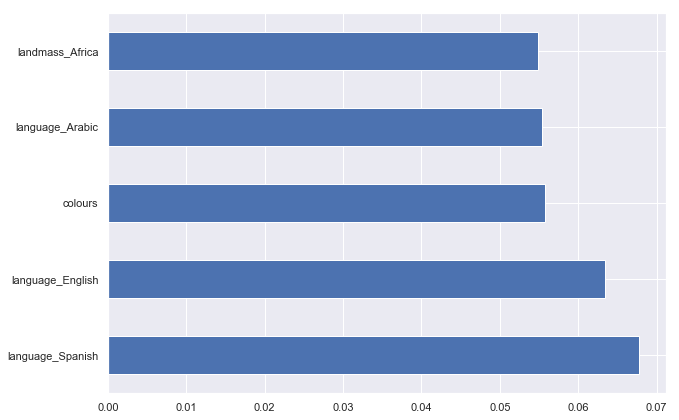

In [34]:
#выведу топ-5 признаков на графике

plt.figure(figsize=(10,7))
columns = X_train_lin.columns
predictors = [x for x in columns]
(pd.Series(model_RF.feature_importances_, predictors).sort_values(ascending=False))[:5].plot(kind='barh')

# 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall

In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [36]:
y_LG = model_LG.predict(X_test_lin)
y_RF = model_RF.predict(X_test_lin)
y_DT = model_DT.predict(X_test_lin)
y_ALL = y_pred_meta_test

In [37]:
print(accuracy_score(y_LG, y_test))
print(accuracy_score(y_RF, y_test))
print(accuracy_score(y_DT, y_test))
print(accuracy_score(y_ALL, y_test))

0.5897435897435898
0.6153846153846154
0.5384615384615384
0.6153846153846154


In [38]:
print(f1_score(y_LG, y_test, average='weighted'))
print(f1_score(y_RF, y_test, average='weighted'))
print(f1_score(y_DT, y_test, average='weighted'))
print(f1_score(y_ALL, y_test, average='weighted'))

0.6114447643859409
0.6358252858252859
0.5259475502359752
0.7063492063492064


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Und

In [39]:
print(precision_score(y_LG, y_test, average='weighted'))
print(precision_score(y_RF, y_test, average='weighted'))
print(precision_score(y_DT, y_test, average='weighted'))
print(precision_score(y_ALL, y_test, average='weighted'))

0.6669180492709905
0.6946958270487682
0.554927099044746
0.8511814982403217


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
print(recall_score(y_LG, y_test, average='weighted'))
print(recall_score(y_RF, y_test, average='weighted'))
print(recall_score(y_DT, y_test, average='weighted'))
print(recall_score(y_ALL, y_test, average='weighted'))

0.5897435897435898
0.6153846153846154
0.5384615384615384
0.6153846153846154


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# 11. Построить Confusion Matrix для ваших результатов

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_LG)

array([[ 5,  1,  0,  0,  0,  0,  0,  0],
       [ 3, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  1,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)